<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1: kNNを用いた分類
- 目的
    - kNNを用いてデータを分類
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://natsutan.hatenablog.com/entry/20180105/1515129019

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 所定の範囲内の領域において、どのクラスに分類されるかを可視化
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカと色の設定
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 予測した分類の境界面の可視化
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 学習データの可視化
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

In [3]:
# Irisデータの2,3番目の列を学習データとして利用
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
# データを表示、先頭から40個ずつ飛ばしたデータを利用（グラフにおける座標値）
print(X[::40])

[[1.4 0.2]
 [1.3 0.3]
 [3.8 1.1]
 [5.7 2.3]]


In [5]:
# クラスを表示、先頭から40個ずつ飛ばしたデータを利用
print(y[::40])

[0 0 1 2]


In [6]:
# 学習データを正規化、平均と分散が0,1となるようにする
sc = StandardScaler() 
sc.fit(X)
X_std = sc.transform(X)

In [7]:
# 分類器の学習
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_std, y)

KNeighborsClassifier()

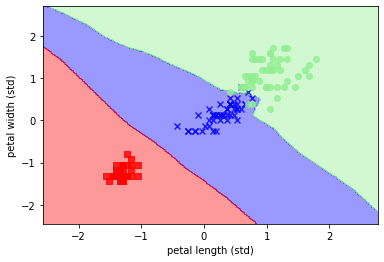

In [8]:
# 結果の表示
# データとして与えた点以外の領域が、それぞれどのクラスとして予測されるかを可視化
plot_decision_regions(X_std, y, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length (std)')
plt.ylabel('petal width (std)')
plt.show()